Dataset disponivel em: https://www.kaggle.com/competitions/deepfake-detection-challenge/data

O dataset utilizado foi o train_sample_videos.zip

 # 1ª parte - geração dos recortes de faces de frames aleatórios dos vídeos do dataset

In [1]:
import os
import json

In [6]:
from zipfile import ZipFile


zip_file_path = r"C:\Users\henri\Desktop\train_sample_videos.zip" # Diretorio local onde o dataset se encontra

temp_dir = 'temp_zip_content' # Diretório temporário para extrair o conteúdo do ZIP
if not os.path.exists(temp_dir): # Caso o diretorio temporario ainda não tenha sido criado
    os.makedirs(temp_dir)

    # Extrair o arquivo ZIP para o diretório temporário
    with ZipFile(zip_file_path, 'r') as zip_file:
        zip_file.extractall(temp_dir)

    # Verificar o conteúdo do diretório temporário
    print("Conteúdo extraído:")
    print(os.listdir(temp_dir))

In [11]:
temp_dir = 'temp_zip_content'

# Dentro da pasta do dataset tem um arquivo metadata.json que contem os rotulos de cada video
metadata_path = temp_dir + r"\metadata.json"
with open(metadata_path, 'r') as file:
    videos_list = json.load(file)
print("Lista de todos os videos")
print(videos_list)

Lista de todos os videos
{'aagfhgtpmv.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'vudstovrck.mp4'}, 'aapnvogymq.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'jdubbvfswz.mp4'}, 'abarnvbtwb.mp4': {'label': 'REAL', 'split': 'train', 'original': None}, 'abofeumbvv.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'atvmxvwyns.mp4'}, 'abqwwspghj.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'qzimuostzz.mp4'}, 'acifjvzvpm.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'kbvibjhfzo.mp4'}, 'acqfdwsrhi.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'ccfoszqabv.mp4'}, 'acxnxvbsxk.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'fjlyaizcwc.mp4'}, 'acxwigylke.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'ffcwhpnpuw.mp4'}, 'aczrgyricp.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'slwkmefgde.mp4'}, 'adhsbajydo.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'fysyrqfguw.mp4'}, 'adohikbdaz.mp4': {'label': 'FAKE', 'split': 'train

In [2]:
import cv2 # pip install opencv-python
import random

# carrega o cascade 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

def save_random_frame(video_path, output_path, name):
    # Abrir o vídeo
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Erro ao abrir o vídeo.")
        return
    
    # Obter o número total de frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(3): # laço para salvar 3 frames aleatórios de cada vídeo
        # Escolher um frame aleatório
        random_frame_number = random.randint(0, total_frames - 1)

        # Definir o frame atual para o aleatório
        cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_number)

        # Ler o frame
        ret, frame = cap.read()

        if not ret:
            print("Erro ao ler o frame.")
            return

        # Converte para escala de cinza
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detecta as faces 
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        new_name = str(i) + name

        # corta os frames na regiao da face
        for (x, y, w, h) in faces: 
            faces = frame[y:y + h, x:x + w] 
            cv2.imwrite(output_path + "\\"  + new_name + ".png", faces)
            # print(f"Frame {random_frame_number} salvo como {new_name + ".png"}")
    
    # Liberar o vídeo
    cap.release()

In [3]:
temp_frames_dir = 'temp_frames_dir' # Diretório temporário para armazenar os frames
if not os.path.exists(temp_frames_dir): # Caso o diretorio temporario ainda não tenha sido criado
    os.makedirs(temp_frames_dir)
    for video in os.listdir(temp_dir):
        if video == "metadata.json":
            continue
        else:
            save_random_frame(temp_dir + "\\" + video, temp_frames_dir, video[:-4]) # salva os frames aleatorios

# 2ª parte - Preparação para o treinamento

In [4]:
import math

# Divide os videos em treino e teste
train_list_size = math.floor(0.8 * len(os.listdir(temp_frames_dir)))
full_list = os.listdir(temp_frames_dir)
categories = ['REAL', 'FAKE']
print("full_list:")
print(full_list)

full_list:
['0aagfhgtpmv.png', '0aapnvogymq.png', '0abarnvbtwb.png', '0abqwwspghj.png', '0acifjvzvpm.png', '0acqfdwsrhi.png', '0acxnxvbsxk.png', '0acxwigylke.png', '0aczrgyricp.png', '0adhsbajydo.png', '0adohikbdaz.png', '0adylbeequz.png', '0aelfnikyqj.png', '0aelzhcnwgf.png', '0aettqgevhz.png', '0aevrfsexku.png', '0afoovlsmtx.png', '0agdkmztvby.png', '0agqphdxmwt.png', '0ahbweevwpv.png', '0ahdbuwqxit.png', '0ahfazfbntc.png', '0ahqqqilsxt.png', '0ajwpjhrbcv.png', '0aklqzsddfl.png', '0aknbdpmgua.png', '0aknmpoonls.png', '0akvmwkdyuv.png', '0akxoopqjqz.png', '0akzbnazxtz.png', '0aladcziidp.png', '0alaijyygdv.png', '0alninxcyhg.png', '0altziddtxi.png', '0alvgwypubw.png', '0amaivqofda.png', '0amowujxmzc.png', '0aneclqfpbt.png', '0aorjvbyxhw.png', '0apgjqzkoma.png', '0aqpnvjhuzw.png', '0arlmiizoob.png', '0arrhsnjqku.png', '0asaxgevnnp.png', '0aslsvlvpth.png', '0asvcrfdpnq.png', '0atkdltyyen.png', '0atxvxouljq.png', '0atyntldecu.png', '0atzdznmder.png', '0aufmsmnoye.png', '0augtsuxpzc.png', 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import models, transforms

# parametros
num_classes = len(categories)
num_splits = 20 # quantidade de divisões para o cross-validation
n_epochs = 3 # quantidade de epocas
batch_size = 16

# funcao de perda escolhida
criterion = nn.CrossEntropyLoss()

In [6]:
# Classe para pre-processamento das imagens
class ImageTransform():

    def __init__(self, resize, mean, std):

        # Para a fase de treinamento, são aplicadas transformações de aumento de dados,
        # como recorte aleatório e espelhamento horizontal,
        # seguidas pela conversão da imagem para um tensor do PyTorch e normalização de cores.

        # Para a fase de validação, a imagem é centralizada e, em seguida,
        # convertida em um tensor e normalizada.

        self.data_transform = {
            'train': transforms.Compose([
                # data augmentation
                transforms.RandomResizedCrop(
                   resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                # convert to tensor for PyTorch
                transforms.ToTensor(),
                # color normalization
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }

    #O método __call__ é implementado para que a classe possa ser chamada como uma função.
    def __call__(self, img, phase='train'):

        return self.data_transform[phase](img)

In [7]:
from PIL import Image

# making dataset
temp_frames_dir = 'temp_frames_dir'

# classe responsável por carregar os dados e aplicar as transformações necessárias
class datasetMaker(data.Dataset):

    def __init__(self, file_list, transform=None, phase='train'):
        self.file_list = file_list # lista de caminhos dos arquivos (train_list ou test_list)
        self.transform = transform
        self.phase = phase

    def __len__(self):
        #  retorna o tamanho do conjunto de dados,
        #  que é o número de amostras na lista de caminhos dos arquivos
        return len(self.file_list)

    def __getitem__(self, index): # carrega uma amostra de dados de acordo com o índice fornecido
        # Pegar o caminho da imagem
        img_path = temp_frames_dir + "\\" + self.file_list[index]

        img_originalsize = Image.open(img_path)
        # resize
        img = img_originalsize.resize((256, 256))

        # grey -> color
        img = img.convert("L").convert("RGB")

        # preprocess
        img_transformed = self.transform(
            img, self.phase)  # torch.Size([3, 224, 224])

        return img_transformed, categories.index(videos_list[self.file_list[index][1:-3]+'mp4']['label'])

In [16]:
from tqdm import tqdm
from sklearn.model_selection import KFold
from torch.utils.data import Subset

# treina o modelo de classificação
def train_model(net, criterion, optimizer, num_epochs, num_splits):
    # recebe como entrada o modelo (net),
    # os dataloaders para treinamento e validação (dataloaders_dict),
    # a função de perda (criterion),
    # o otimizador (optimizer)
    # e o número de épocas (num_epochs)

    accuracy_list = []
    loss_list = []

    # Cria o objeto KFold
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

    size = 256
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)

    # Loop de validação cruzada
    for fold, (train_idx, val_idx) in enumerate(kf.split(full_list)):
        print('-------------')
        print(f'Fold {fold+1}/{num_splits}')
        print('-------------')

        # Cria os subconjuntos de treinamento e validação usando Subset
        train_subset = Subset(full_list, train_idx)
        val_subset = Subset(full_list, val_idx)

        train_dataset = datasetMaker(
        file_list=train_subset, transform=ImageTransform(size, mean, std), phase='train')
        val_dataset = datasetMaker(
        file_list=val_subset, transform=ImageTransform(size, mean, std), phase='val')

        # dataloaders são criados para carregar dados em lotes durante o treinamento
        train_dataloader = torch.utils.data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True)

        val_dataloader = torch.utils.data.DataLoader(
            val_dataset, batch_size=batch_size, shuffle=False)

        # os dataloaders são colocados em um dicionario
        dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

        # verifica se a GPU está disponível e transfere o modelo para a GPU, se disponível
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("using device：", device)

        # coloca o modelo na GPU
        net.to(device)
        torch.backends.cudnn.benchmark = True

        # loop das epocas
        for epoch in range(num_epochs):
            print(f'Epoch {epoch+1}/{num_epochs}')
            print('-------------')

            for phase in ['train', 'val']: # para cada época de treinamento ('train') e validação ('test')
                if phase == 'train':
                    net.train()  # set network 'train' mode
                else:
                    net.eval()   # set network 'test' mode

                # perdas e acurácia são reiniciadas para cada fase
                epoch_loss = 0.0
                epoch_corrects = 0

                # Before training
                if (epoch == 0) and (phase == 'train'):
                    continue


                # loop interno itera sobre cada lote de dados em dataloaders_dict[phase]
                for inputs, labels in tqdm(dataloaders_dict[phase]):

                    # dados de entrada e os rótulos são transferidos para a GPU, se disponível
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # otimizador é zerado
                    optimizer.zero_grad()

                    # forward
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = net(inputs) # modelo é executado para frente
                        loss = criterion(outputs, labels)  # perda é calculada
                        _, preds = torch.max(outputs, 1)  # predict

                        # back propagtion
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                        # update loss summation
                        epoch_loss += loss.item() * inputs.size(0)
                        # update correct prediction summation
                        epoch_corrects += torch.sum(preds == labels.data)

                # loss e accuracy para cada epoca
                epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
                epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                if phase == 'val':
                    accuracy_list.append(epoch_acc.item())
                    loss_list.append(epoch_loss)

    return accuracy_list, loss_list

In [8]:
# carrega vgg16 pre-treinada
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

# substitui a camada de saída original do modelo VGG-16,
# que tinha 1000 saídas correspondentes às classes na base de dados de ImageNet,
# por uma nova camada linear com 2 saídas, adequada para classificação que precisamos
net.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)

net.train() # coloca o modelo em modo de treinamento

for param in net.parameters():
    param.requires_grad = True # descongela tudo

optimizer = optim.Adam(net.parameters(), lr=0.001)

c:\Users\henri\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\henri\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Treinamento

In [18]:
accuracy_list, loss_list = train_model(net, criterion, optimizer, num_epochs=n_epochs, num_splits = num_splits)

print("\n ------------------------------- \n")

print("accuracy_list: ")
print(accuracy_list)
print("\n")
print("loss_list: ")
print(loss_list)

-------------
Fold 1/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:06<00:00,  1.65s/it]


val Loss: 0.8420 Acc: 0.2157
Epoch 2/3
-------------


100%|██████████| 61/61 [00:51<00:00,  1.18it/s]


train Loss: 1.2118 Acc: 0.7859


100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


val Loss: 0.4926 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:35<00:00,  1.71it/s]


train Loss: 0.5272 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  5.22it/s]


val Loss: 0.4953 Acc: 0.8039
-------------
Fold 2/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  5.20it/s]


val Loss: 0.5216 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.69it/s]


train Loss: 0.4990 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  5.04it/s]


val Loss: 0.5249 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.65it/s]


train Loss: 0.5062 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


val Loss: 0.5230 Acc: 0.7843
-------------
Fold 3/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  5.52it/s]


val Loss: 0.4388 Acc: 0.8431
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.66it/s]


train Loss: 0.5147 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  4.76it/s]


val Loss: 0.4869 Acc: 0.8431
Epoch 3/3
-------------


100%|██████████| 61/61 [00:40<00:00,  1.50it/s]


train Loss: 0.5095 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


val Loss: 0.4618 Acc: 0.8431
-------------
Fold 4/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


val Loss: 0.5253 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5063 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


val Loss: 0.5368 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5102 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.73it/s]


val Loss: 0.5244 Acc: 0.7843
-------------
Fold 5/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.35it/s]


val Loss: 0.4953 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.63it/s]


train Loss: 0.5043 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.77it/s]


val Loss: 0.5006 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.61it/s]


train Loss: 0.5086 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.54it/s]


val Loss: 0.4955 Acc: 0.8039
-------------
Fold 6/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.67it/s]


val Loss: 0.4955 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.68it/s]


train Loss: 0.5108 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


val Loss: 0.5032 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.68it/s]


train Loss: 0.5068 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


val Loss: 0.4952 Acc: 0.8039
-------------
Fold 7/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


val Loss: 0.4375 Acc: 0.8431
Epoch 2/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.64it/s]


train Loss: 0.5021 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


val Loss: 0.4346 Acc: 0.8431
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5124 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


val Loss: 0.4345 Acc: 0.8431
-------------
Fold 8/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


val Loss: 0.3002 Acc: 0.9216
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.68it/s]


train Loss: 0.5139 Acc: 0.7952


100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


val Loss: 0.3389 Acc: 0.9216
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5107 Acc: 0.7952


100%|██████████| 4/4 [00:00<00:00,  5.05it/s]


val Loss: 0.3375 Acc: 0.9216
-------------
Fold 9/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.71it/s]


val Loss: 0.4953 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5023 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


val Loss: 0.4956 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.65it/s]


train Loss: 0.5133 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


val Loss: 0.4964 Acc: 0.8039
-------------
Fold 10/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.20it/s]


val Loss: 0.4964 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:35<00:00,  1.72it/s]


train Loss: 0.5047 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


val Loss: 0.4983 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.62it/s]


train Loss: 0.5088 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.69it/s]


val Loss: 0.4963 Acc: 0.8039
-------------
Fold 11/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


val Loss: 0.5214 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.62it/s]


train Loss: 0.5026 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


val Loss: 0.5216 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.64it/s]


train Loss: 0.5023 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  5.03it/s]


val Loss: 0.5231 Acc: 0.7843
-------------
Fold 12/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


val Loss: 0.4668 Acc: 0.8235
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5080 Acc: 0.8004


100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


val Loss: 0.4705 Acc: 0.8235
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5005 Acc: 0.8004


100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


val Loss: 0.4665 Acc: 0.8235
-------------
Fold 13/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


val Loss: 0.5238 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5038 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.95it/s]


val Loss: 0.5242 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:36<00:00,  1.67it/s]


train Loss: 0.5013 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.85it/s]


val Loss: 0.5222 Acc: 0.7843
-------------
Fold 14/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


val Loss: 0.5512 Acc: 0.7600
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.56it/s]


train Loss: 0.5039 Acc: 0.8037


100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


val Loss: 0.5513 Acc: 0.7600
Epoch 3/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.44it/s]


train Loss: 0.4985 Acc: 0.8037


100%|██████████| 4/4 [00:00<00:00,  4.09it/s]


val Loss: 0.5552 Acc: 0.7600
-------------
Fold 15/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.07it/s]


val Loss: 0.6373 Acc: 0.7000
Epoch 2/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.42it/s]


train Loss: 0.4960 Acc: 0.8069


100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


val Loss: 0.6474 Acc: 0.7000
Epoch 3/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.42it/s]


train Loss: 0.4984 Acc: 0.8069


100%|██████████| 4/4 [00:01<00:00,  3.79it/s]


val Loss: 0.6500 Acc: 0.7000
-------------
Fold 16/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:01<00:00,  3.73it/s]


val Loss: 0.6798 Acc: 0.6800
Epoch 2/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.42it/s]


train Loss: 0.4935 Acc: 0.8079


100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


val Loss: 0.6627 Acc: 0.6800
Epoch 3/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.44it/s]


train Loss: 0.4953 Acc: 0.8079


100%|██████████| 4/4 [00:01<00:00,  3.88it/s]


val Loss: 0.6620 Acc: 0.6800
-------------
Fold 17/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


val Loss: 0.3929 Acc: 0.8800
Epoch 2/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.42it/s]


train Loss: 0.5071 Acc: 0.7975


100%|██████████| 4/4 [00:01<00:00,  3.89it/s]


val Loss: 0.3885 Acc: 0.8800
Epoch 3/3
-------------


100%|██████████| 61/61 [00:43<00:00,  1.42it/s]


train Loss: 0.5072 Acc: 0.7975


100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


val Loss: 0.3976 Acc: 0.8800
-------------
Fold 18/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


val Loss: 0.5011 Acc: 0.8000
Epoch 2/3
-------------


100%|██████████| 61/61 [00:42<00:00,  1.44it/s]


train Loss: 0.5029 Acc: 0.8017


100%|██████████| 4/4 [00:01<00:00,  3.88it/s]


val Loss: 0.5004 Acc: 0.8000
Epoch 3/3
-------------


100%|██████████| 61/61 [00:41<00:00,  1.47it/s]


train Loss: 0.5002 Acc: 0.8017


100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


val Loss: 0.5016 Acc: 0.8000
-------------
Fold 19/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.02it/s]


val Loss: 0.4109 Acc: 0.8600
Epoch 2/3
-------------


100%|██████████| 61/61 [01:59<00:00,  1.97s/it]


train Loss: 0.5057 Acc: 0.7985


100%|██████████| 4/4 [00:00<00:00,  4.22it/s]


val Loss: 0.4308 Acc: 0.8600
Epoch 3/3
-------------


100%|██████████| 61/61 [00:41<00:00,  1.47it/s]


train Loss: 0.5106 Acc: 0.7985


100%|██████████| 4/4 [00:00<00:00,  4.23it/s]


val Loss: 0.4339 Acc: 0.8600
-------------
Fold 20/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.29it/s]


val Loss: 0.5511 Acc: 0.7600
Epoch 2/3
-------------


100%|██████████| 61/61 [00:41<00:00,  1.46it/s]


train Loss: 0.4967 Acc: 0.8037


100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


val Loss: 0.5527 Acc: 0.7600
Epoch 3/3
-------------


100%|██████████| 61/61 [00:45<00:00,  1.34it/s]


train Loss: 0.5007 Acc: 0.8037


100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

val Loss: 0.5516 Acc: 0.7600

 ------------------------------- 

accuracy_list: 
[0.21568627450980393, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.9215686274509803, 0.9215686274509803, 0.9215686274509803, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.76, 0.76, 0.76, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.68, 0.68, 0.68, 0.88, 0.88, 0.88, 0.8, 0.8, 0.8, 0.86, 0.86, 0.86, 0.76

# Avaliação

In [19]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


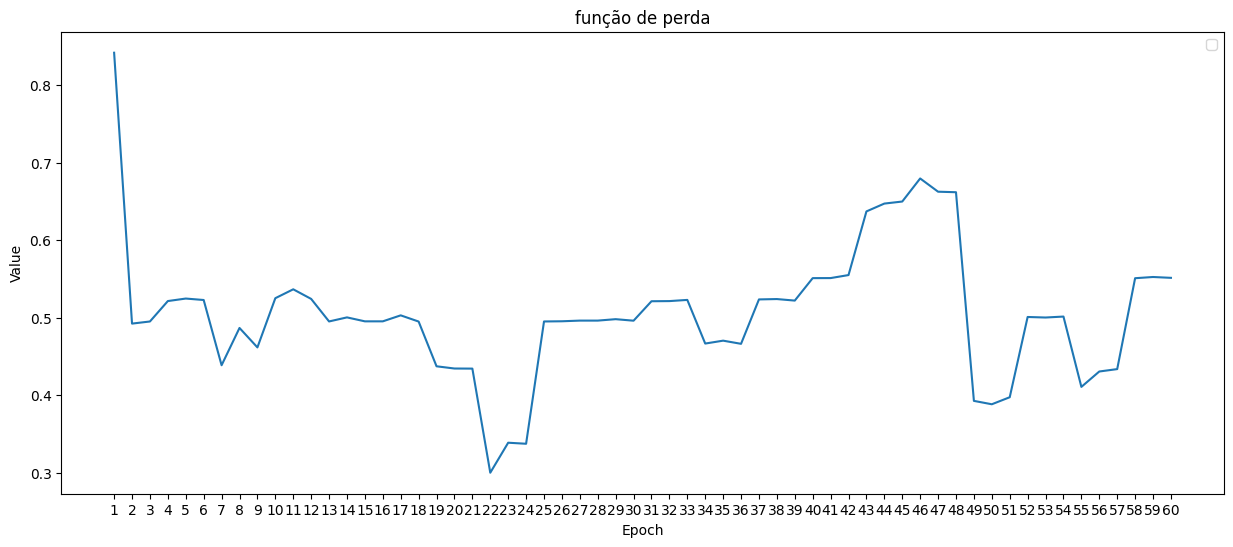

In [27]:
# Criar gráficos de linhas para a função de perda de entropia cruzada (Cross-entropy) por 50 épocas
epoch_num = list(range(1, num_splits*n_epochs+1))  # Adicionado +1 para começar de 1
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
ax.plot(epoch_num, loss_list, label="")
plt.xticks(epoch_num)

ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('função de perda')

ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


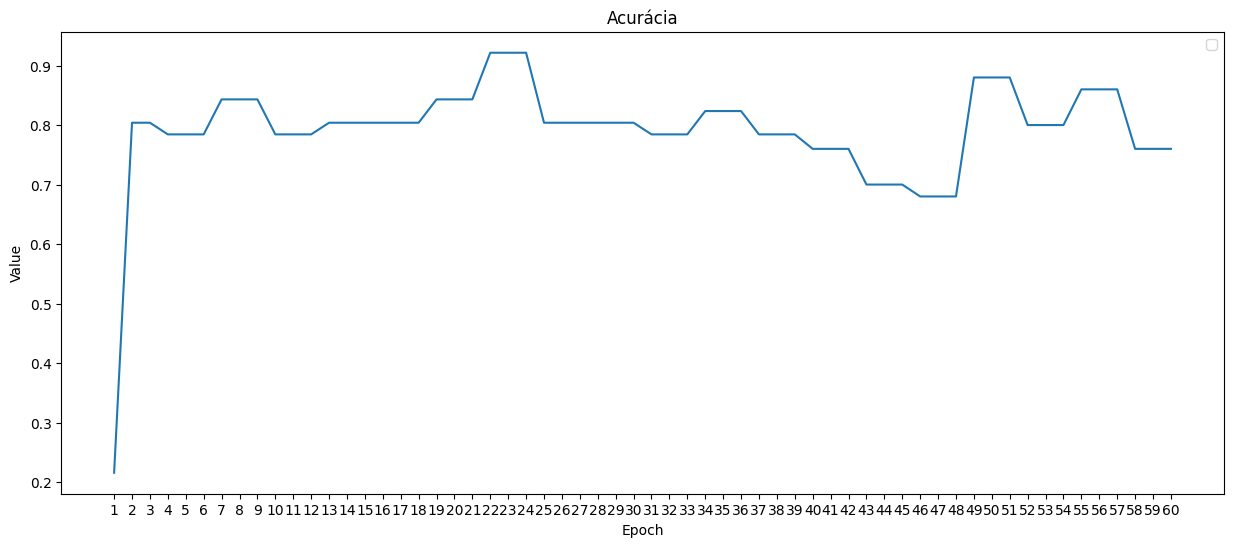

In [23]:
# Criar gráficos de linhas para a função de perda de entropia cruzada (Cross-entropy) por 50 épocas
epoch_num = list(range(1, num_splits*n_epochs+1))  # Adicionado +1 para começar de 1
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
ax.plot(epoch_num, accuracy_list, label="")
plt.xticks(epoch_num)

ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('Acurácia')

ax.legend()

plt.show()

# Early Stopping
Considerando os resultados anteriores, percebemos que houve apenas um pico de acurária acima de 0.9. 
Portanto, a seguir segue uma implementação do treinamento/validação com Parada Antecipada ao atingirmos acurácia igual ou maior a esse valor.

In [13]:
from tqdm import tqdm
from sklearn.model_selection import KFold
from torch.utils.data import Subset

# treina o modelo de classificação
def train_model_es(net, criterion, optimizer, num_epochs, num_splits):
    # recebe como entrada o modelo (net),
    # os dataloaders para treinamento e validação (dataloaders_dict),
    # a função de perda (criterion),
    # o otimizador (optimizer)
    # e o número de épocas (num_epochs)

    accuracy_list = []
    loss_list = []

    # Cria o objeto KFold
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

    size = 256
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)

    # Loop de validação cruzada
    for fold, (train_idx, val_idx) in enumerate(kf.split(full_list)):
        print('-------------')
        print(f'Fold {fold+1}/{num_splits}')
        print('-------------')

        # Cria os subconjuntos de treinamento e validação usando Subset
        train_subset = Subset(full_list, train_idx)
        val_subset = Subset(full_list, val_idx)

        train_dataset = datasetMaker(
        file_list=train_subset, transform=ImageTransform(size, mean, std), phase='train')
        val_dataset = datasetMaker(
        file_list=val_subset, transform=ImageTransform(size, mean, std), phase='val')

        # dataloaders são criados para carregar dados em lotes durante o treinamento
        train_dataloader = torch.utils.data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True)

        val_dataloader = torch.utils.data.DataLoader(
            val_dataset, batch_size=batch_size, shuffle=False)

        # os dataloaders são colocados em um dicionario
        dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

        # verifica se a GPU está disponível e transfere o modelo para a GPU, se disponível
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("using device：", device)

        # coloca o modelo na GPU
        net.to(device)
        torch.backends.cudnn.benchmark = True

        # loop das epocas
        for epoch in range(num_epochs):
            print(f'Epoch {epoch+1}/{num_epochs}')
            print('-------------')

            for phase in ['train', 'val']: # para cada época de treinamento ('train') e validação ('test')
                if phase == 'train':
                    net.train()  # set network 'train' mode
                else:
                    net.eval()   # set network 'test' mode

                # perdas e acurácia são reiniciadas para cada fase
                epoch_loss = 0.0
                epoch_corrects = 0

                # Before training
                if (epoch == 0) and (phase == 'train'):
                    continue


                # loop interno itera sobre cada lote de dados em dataloaders_dict[phase]
                for inputs, labels in tqdm(dataloaders_dict[phase]):

                    # dados de entrada e os rótulos são transferidos para a GPU, se disponível
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # otimizador é zerado
                    optimizer.zero_grad()

                    # forward
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = net(inputs) # modelo é executado para frente
                        loss = criterion(outputs, labels)  # perda é calculada
                        _, preds = torch.max(outputs, 1)  # predict

                        # back propagtion
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                        # update loss summation
                        epoch_loss += loss.item() * inputs.size(0)
                        # update correct prediction summation
                        epoch_corrects += torch.sum(preds == labels.data)

                # loss e accuracy para cada epoca
                epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
                epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                if phase == 'val':
                    accuracy_list.append(epoch_acc.item())
                    loss_list.append(epoch_loss)
                    if(epoch_acc.item() >= 0.9): 
                        return accuracy_list, loss_list

    return accuracy_list, loss_list

In [14]:
accuracy_list, loss_list = train_model_es(net, criterion, optimizer, num_epochs=n_epochs, num_splits = num_splits)

print("\n ------------------------------- \n")

print("accuracy_list: ")
print(accuracy_list)
print("\n")
print("loss_list: ")
print(loss_list)

-------------
Fold 1/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.28it/s]


val Loss: 0.4952 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:41<00:00,  1.47it/s]


train Loss: 0.5045 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


val Loss: 0.4988 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:40<00:00,  1.49it/s]


train Loss: 0.5071 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.89it/s]


val Loss: 0.4955 Acc: 0.8039
-------------
Fold 2/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.99it/s]


val Loss: 0.5215 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:45<00:00,  1.34it/s]


train Loss: 0.5016 Acc: 0.8025


100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


val Loss: 0.5293 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:45<00:00,  1.33it/s]


train Loss: 0.5072 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.96it/s]


val Loss: 0.5243 Acc: 0.7843
-------------
Fold 3/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


val Loss: 0.4372 Acc: 0.8431
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.57it/s]


train Loss: 0.5109 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  4.71it/s]


val Loss: 0.4344 Acc: 0.8431
Epoch 3/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.57it/s]


train Loss: 0.5106 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  5.05it/s]


val Loss: 0.4385 Acc: 0.8431
-------------
Fold 4/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


val Loss: 0.5232 Acc: 0.7843
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.57it/s]


train Loss: 0.5009 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.61it/s]


val Loss: 0.5214 Acc: 0.7843
Epoch 3/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.58it/s]


train Loss: 0.5073 Acc: 0.8025


100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


val Loss: 0.5223 Acc: 0.7843
-------------
Fold 5/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


val Loss: 0.4949 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.60it/s]


train Loss: 0.5044 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  5.59it/s]


val Loss: 0.4949 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.62it/s]


train Loss: 0.5064 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  5.25it/s]


val Loss: 0.4949 Acc: 0.8039
-------------
Fold 6/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


val Loss: 0.4949 Acc: 0.8039
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.58it/s]


train Loss: 0.4999 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


val Loss: 0.5080 Acc: 0.8039
Epoch 3/3
-------------


100%|██████████| 61/61 [00:37<00:00,  1.62it/s]


train Loss: 0.5054 Acc: 0.8015


100%|██████████| 4/4 [00:00<00:00,  5.08it/s]


val Loss: 0.4977 Acc: 0.8039
-------------
Fold 7/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


val Loss: 0.4349 Acc: 0.8431
Epoch 2/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.59it/s]


train Loss: 0.5099 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  5.60it/s]


val Loss: 0.4540 Acc: 0.8431
Epoch 3/3
-------------


100%|██████████| 61/61 [00:38<00:00,  1.59it/s]


train Loss: 0.5090 Acc: 0.7994


100%|██████████| 4/4 [00:00<00:00,  5.32it/s]


val Loss: 0.4378 Acc: 0.8431
-------------
Fold 8/20
-------------
using device： cuda:0
Epoch 1/3
-------------


100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

val Loss: 0.3232 Acc: 0.9216

 ------------------------------- 

accuracy_list: 
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.9215686274509803]


loss_list: 
[0.4952364099376342, 0.49879561802920175, 0.49554213326351315, 0.5214787172336205, 0.5292580560141918, 0.5243138039813322, 0.4372426002633338, 0.4344317562439862, 0.4384802086096184, 0.5232419310247197, 0.5213941712589825, 0.5222971334176905, 0.494936955910103, 0.49492160099394183, 0.49494896799910304, 0.49494899604834763, 0.5080415933739906, 0.4976502540064793, 0.43487168731642706, 0.45396849922105376, 0.4378044044270235, 0.3231803587838715]


In [15]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


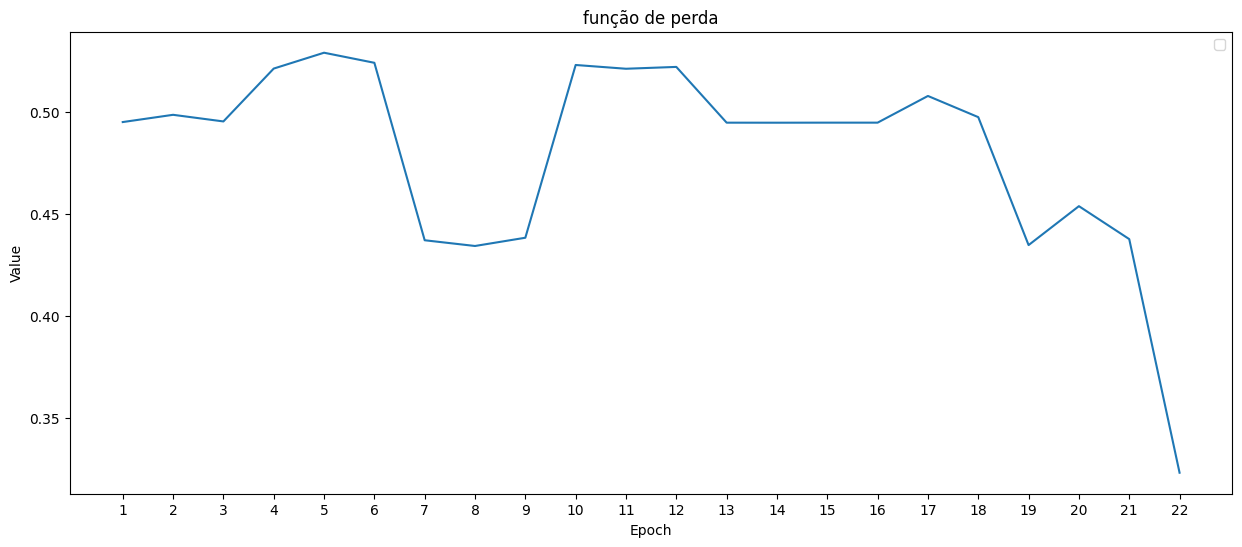

In [17]:
# Criar gráficos de linhas para a função de perda de entropia cruzada (Cross-entropy) por 50 épocas
epoch_num = list(range(1, len(loss_list)+1))  # Adicionado +1 para começar de 1
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
ax.plot(epoch_num, loss_list, label="")
plt.xticks(epoch_num)

ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('função de perda')

ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


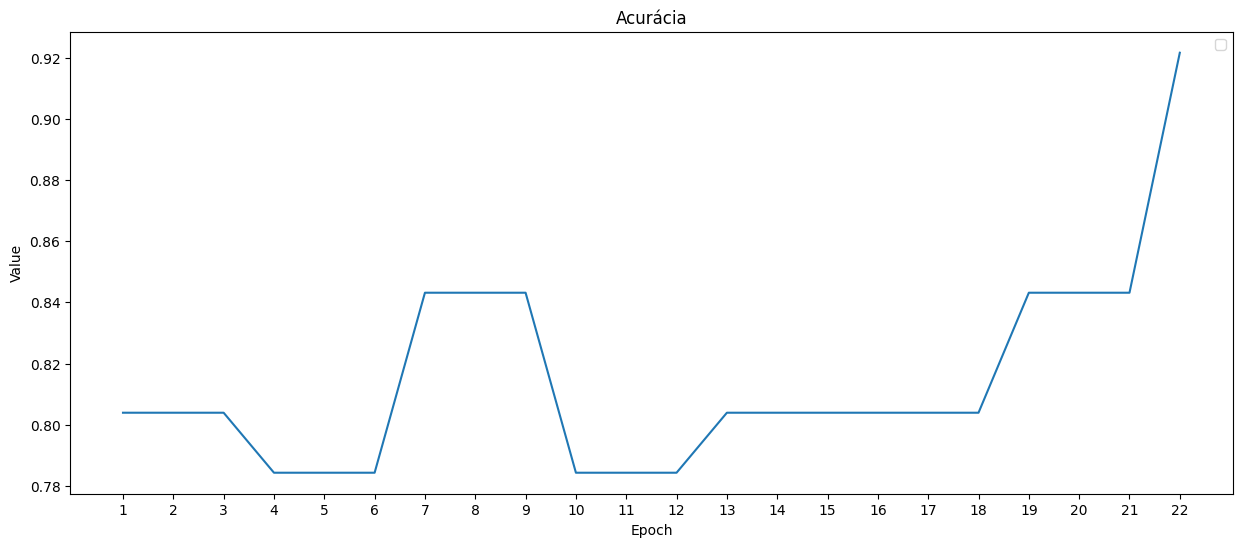

In [18]:
# Criar gráficos de linhas para a função de perda de entropia cruzada (Cross-entropy) por 50 épocas
epoch_num = list(range(1, len(accuracy_list)+1))  # Adicionado +1 para começar de 1
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
ax.plot(epoch_num, accuracy_list, label="")
plt.xticks(epoch_num)

ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('Acurácia')

ax.legend()

plt.show()